In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Train_data=pd.read_excel('Data_Train.xlsx')
Test_data=pd.read_excel('Data_Test.xlsx')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [5]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
print('Train_data:',Train_data.shape)
print('\n')
print('Test_data:',Test_data.shape)

Train_data: (12690, 9)


Test_data: (4231, 8)


In [7]:
Train_data.shape

(12690, 9)

In [8]:
Train_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [9]:
Train_data.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

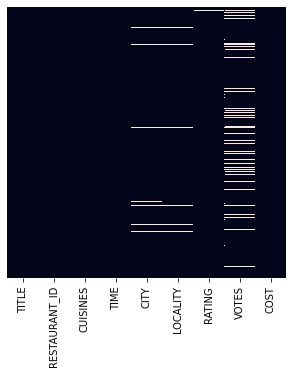

In [10]:
plt.figure(figsize=(5,5))
sns.heatmap(Train_data.isnull(),yticklabels=False,cbar=False)

In [11]:
Train_data.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
12685,False,False,False,False,False,False,False,False,False
12686,False,False,False,False,False,False,False,False,False
12687,False,False,False,False,False,False,False,False,False
12688,False,False,False,False,False,False,False,False,False


In [12]:
Train_data.isnull().values.any()

True

In [13]:
Train_data.dropna(inplace=True)

In [14]:
Train_data.isnull().values.any()

False

In [15]:
Train_data.shape

(11393, 9)

In [16]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11393 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          11393 non-null  object
 1   RESTAURANT_ID  11393 non-null  int64 
 2   CUISINES       11393 non-null  object
 3   TIME           11393 non-null  object
 4   CITY           11393 non-null  object
 5   LOCALITY       11393 non-null  object
 6   RATING         11393 non-null  object
 7   VOTES          11393 non-null  object
 8   COST           11393 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 890.1+ KB


In [17]:
Train_data.describe()

,RESTAURANT_ID,COST
count,11393.000000,11393.000000
mean,7791.278329,682.670148
std,4508.401395,646.942238
min,0.000000,50.000000
25%,3883.000000,300.000000
50%,7807.000000,500.000000
75%,11730.000000,800.000000
max,15573.000000,14000.000000


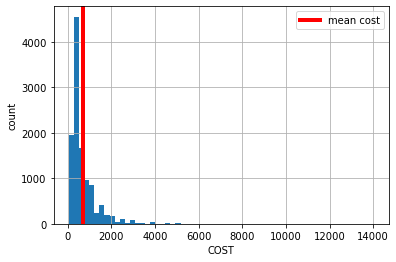

In [18]:
price=Train_data['COST'].hist(bins=60)
mean_val=np.mean(Train_data['COST'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean cost')
plt.xlabel('COST')
plt.ylabel('count')
plt.legend()
plt.show()

In [19]:
for column in Train_data.columns:
    if Train_data[column].dtypes==object:
        print(str(column)+ ':' +str(Train_data[column].unique()))
        print(Train_data[column].value_counts())
        print('**************************************************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'PUB,CASUAL DINING' 'MESS' 'MICROBREWERY,CASUAL DINING'
 'CASUAL DINING,SWEET SHOP' 'KIOSK' 'QUICK BITES,KIOSK' 'CLUB'
 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES' 'FOOD COURT,QUICK BITES'
 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'CASUAL DINING,CAFÉ' 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY'
 'LOUNGE,BAR' 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'QUICK BITES,SWEET SHOP'
 'BEVERAGE SHOP,QUI

In [20]:
Train_data_cor=Train_data.corr()
Train_data_cor

,RESTAURANT_ID,COST
RESTAURANT_ID,1.0000,0.0411
COST,0.0411,1.0000


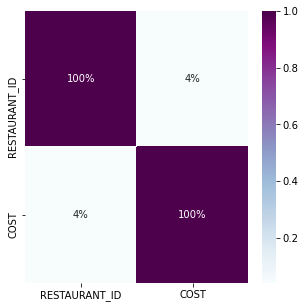

In [21]:
plt.figure(figsize=(5,5))
sns.heatmap(Train_data_cor,annot=True,fmt='.0%',cmap='BuPu')
plt.show()

In [22]:
Train_data.skew()

RESTAURANT_ID   -0.006335
RATING          -0.517737
COST             3.897526
dtype: float64

In [23]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in Train_data.columns:
    if Train_data[column].dtype==np.number:
        continue
    Train_data[column]=le.fit_transform(Train_data[column])

In [24]:
Train_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,6443,2463,700,300,267,16,1277,34
1,31,9060,275,1799,63,961,22,949,41
2,29,7484,2800,623,63,1015,18,711,26
3,93,4349,3893,257,206,128,21,786,26
4,48,10581,1663,581,206,573,18,469,12


In [25]:
Train_data.shape

(11393, 9)

In [26]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [27]:
Test_data.shape

(4231, 8)

In [28]:
Test_data.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES'],
      dtype='object')

In [29]:
Test_data.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

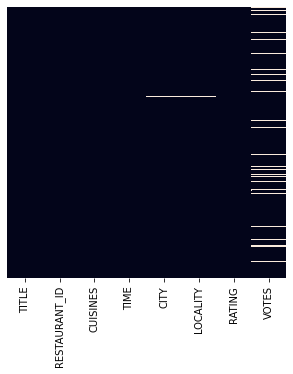

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(Test_data.isnull(),yticklabels=False,cbar=False)

In [31]:
Test_data.isnull()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
4226,False,False,False,False,False,False,False,False
4227,False,False,False,False,False,False,False,False
4228,False,False,False,False,False,False,False,False
4229,False,False,False,False,False,False,False,True


In [32]:
Test_data.isnull().values.any()

True

In [33]:
Test_data.dropna(inplace=True)

In [34]:
Test_data.isnull().values.any()

False

In [35]:
Test_data.shape

(3797, 8)

In [36]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3797 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          3797 non-null   object
 1   RESTAURANT_ID  3797 non-null   int64 
 2   CUISINES       3797 non-null   object
 3   TIME           3797 non-null   object
 4   CITY           3797 non-null   object
 5   LOCALITY       3797 non-null   object
 6   RATING         3797 non-null   object
 7   VOTES          3797 non-null   object
dtypes: int64(1), object(7)
memory usage: 267.0+ KB


In [37]:
Test_data.describe()

,RESTAURANT_ID
count,3797.000000
mean,7822.147221
std,4468.346917
min,5.000000
25%,3923.000000
50%,7851.000000
75%,11691.000000
max,15572.000000


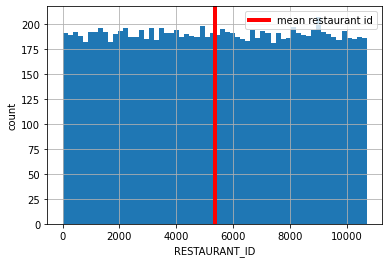

In [38]:
price=Train_data['RESTAURANT_ID'].hist(bins=60)
mean_val=np.mean(Train_data['RESTAURANT_ID'])
plt.axvline(mean_val,linewidth=4,color='red',label='mean restaurant id')
plt.xlabel('RESTAURANT_ID')
plt.ylabel('count')
plt.legend()
plt.show()

In [39]:
for column in Test_data.columns:
    if Test_data[column].dtypes==object:
        print(str(column)+ ':' +str(Test_data[column].unique()))
        print(Test_data[column].value_counts())
        print('**************************************************************************************************')
        print('\n')

TITLE:['CASUAL DINING' 'QUICK BITES' 'None' 'FOOD TRUCK,DESSERT PARLOR'
 'DESSERT PARLOR,QUICK BITES' 'CASUAL DINING,BAR' 'LOUNGE' 'BEVERAGE SHOP'
 'CASUAL DINING,PUB' 'DESSERT PARLOR' 'PUB' 'CAFÉ' 'BAKERY' 'LOUNGE,BAR'
 'BAKERY,QUICK BITES' 'SWEET SHOP' 'SWEET SHOP,QUICK BITES'
 'BEVERAGE SHOP,QUICK BITES' 'CAFÉ,QUICK BITES' 'DHABA'
 'QUICK BITES,DESSERT PARLOR' 'FINE DINING' 'IRANI CAFE,BAKERY'
 'PUB,CASUAL DINING' 'BAR' 'FOOD COURT' 'QUICK BITES,SWEET SHOP'
 'CAFÉ,BAR' 'BAR,PUB' 'BAKERY,DESSERT PARLOR' 'KIOSK' 'CAFÉ,BAKERY'
 'CASUAL DINING,BAKERY' 'BAKERY,CAFÉ' 'CASUAL DINING,CAFÉ' 'MESS'
 'BAR,CASUAL DINING' 'BEVERAGE SHOP,CAFÉ' 'BEVERAGE SHOP,DESSERT PARLOR'
 'PUB,FINE DINING' 'CASUAL DINING,FOOD COURT' 'CAFÉ,CASUAL DINING'
 'LOUNGE,CASUAL DINING' 'DESSERT PARLOR,CAFÉ' 'FINE DINING,BAR'
 'CASUAL DINING,SWEET SHOP' 'LOUNGE,FINE DINING' 'MICROBREWERY,PUB'
 'FOOD TRUCK' 'CASUAL DINING,MICROBREWERY' 'CLUB' 'CAFÉ,FOOD COURT'
 'CAFÉ,DESSERT PARLOR' 'MICROBREWERY,CASUAL DINING'
 'DESSERT

In [40]:
Test_data_cor=Test_data.corr()
Test_data_cor

,RESTAURANT_ID
RESTAURANT_ID,1.0


In [41]:
Test_data.skew()

RESTAURANT_ID   -0.002733
RATING          -0.581118
dtype: float64

In [42]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in Test_data.columns:
    if Test_data[column].dtype==np.number:
        continue
    Test_data[column]=le.fit_transform(Test_data[column])

In [43]:
Test_data.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,22,972,1210,480,103,619,22,822
1,73,3015,1528,886,90,208,21,869
2,22,307,1368,206,90,388,17,574
3,64,41,190,1013,41,433,17,179
4,73,3197,1532,198,74,283,15,394


In [44]:
Test_data.shape

(3797, 8)

In [45]:
Train_data.shape

(11393, 9)

In [46]:
x=Train_data.drop(columns=['RESTAURANT_ID'],axis=1)
x.head()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,29,2463,700,300,267,16,1277,34
1,31,275,1799,63,961,22,949,41
2,29,2800,623,63,1015,18,711,26
3,93,3893,257,206,128,21,786,26
4,48,1663,581,206,573,18,469,12


In [47]:
y=Train_data['RESTAURANT_ID']
y.head()

0     6443
1     9060
2     7484
3     4349
4    10581
Name: RESTAURANT_ID, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [50]:
x_train.shape

(9114, 8)

In [52]:
y_train.shape

(9114,)

In [53]:
x_test.shape

(2279, 8)

In [54]:
y_test.shape

(2279,)

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
lr.coef_

array([ 43.7552988 , 189.94196971, -19.70230617,  28.70113436,
       -68.47861861,  83.80551889,  42.15625177, 118.54259782])

In [59]:
lr.intercept_

5351.8919108462205

In [60]:
lr.score(x_train,y_train)

0.007178541067870858

In [61]:
Active=lr.predict(x_test)
print('Predicted active:',Active)
print('actual active',y_test)

Predicted active: [5177.80643675 5552.96740054 5239.54079576 ... 5378.96144858 5204.50030704
 5275.82915181]
actual active 7585    4419
2340    2993
2069    9389
2798    8973
8643    3991
        ... 
4154    1005
7463    6491
8208    2913
3829    2884
5309    9299
Name: RESTAURANT_ID, Length: 2279, dtype: int64


In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error:',mean_absolute_error(y_test,Active))

print('Mean squared error:',mean_squared_error(y_test,Active))


error:
Mean absolute error: 2663.487543150611
Mean squared error: 9480751.933476312


In [63]:
from sklearn.metrics import r2_score
print(r2_score(y_test,Active))

0.0027983609695639844


In [64]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
cross_val_score(linear_model.LinearRegression(),x,y,cv=5,scoring='r2').mean()

0.004629481420789339

In [65]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [66]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('r2_score:',r2_score(y_test,predm))
    print('***************************************************************')
    print('\n')

Score of LinearRegression() is: 0.007178541067870858
Error:
Mean absolute error: 2663.487543150611
Mean squared error: 9480751.933476312
r2_score: 0.0027983609695639844
***************************************************************


Score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 3536.2264150943397
Mean squared error: 19142974.8214129
r2_score: -1.0134907021907273
***************************************************************


Score of KNeighborsRegressor() is: 0.20937659058511982
Error:
Mean absolute error: 2860.3159280386135
Mean squared error: 11518730.766757349
r2_score: -0.2115597244562626
***************************************************************


Score of SVR() is: 0.0015652785581142803
Error:
Mean absolute error: 2672.026822770608
Mean squared error: 9500790.683471486
r2_score: 0.0006906511086245404
***************************************************************


Score of Lasso() is: 0.007177640467823987
Error:
Mean absolute error: 2663.492751388

In [67]:
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
parameters={'alpha':[0.001,0.01,0.1,1],'random_state':range(42,100)}
clf=GridSearchCV(ridge,parameters)
clf.fit(x,y)
clf.best_params_

{'alpha': 1, 'random_state': 42}

In [68]:
ridge=Ridge(alpha=1,random_state=42)
ridge.fit(x_train,y_train)
print('Score:',ridge.score(x_train,y_train))
predrd=ridge.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrd)) 
print('Mean squared error:',mean_squared_error(y_test,predrd))
print('\n')
print('r2_score:',r2_score(y_test,predrd))

Score: 0.0071785409837182845


Mean absolute error: 2663.488014658406
Mean squared error: 9480746.883715188


r2_score: 0.002798892112041207


In [69]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20,random_state=59)
rf.fit(x_train,y_train)
print('Score:',rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predrf)) 
print('Mean squared error:',mean_squared_error(y_test,predrf))
print('\n')
print('r2_score:',r2_score(y_test,predrf))

Score: 0.8314171422295531


Mean absolute error: 2731.1984642387006
Mean squared error: 10208932.217301447


r2_score: -0.07379288175413623


In [70]:
from sklearn.ensemble import AdaBoostRegressor
lasso=Lasso()

adb=AdaBoostRegressor(base_estimator=lasso,n_estimators=20,learning_rate=0.1,random_state=59)
adb.fit(x_train,y_train)
print('Score:',adb.score(x_train,y_train))
predadb=adb.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,predadb)) 
print('Mean squared error:',mean_squared_error(y_test,predadb))
print('\n')
print('r2_score:',r2_score(y_test,predadb))

Score: 0.006951907125826606


Mean absolute error: 2663.8846150237396
Mean squared error: 9478367.342397254


r2_score: 0.003049176321462066


In [71]:
import joblib
joblib.dump(rf,'Restaurant Food Cost')

['Restaurant Food Cost']